# Strategy Comparisons

This notebook compares the performances of five strategies: 
* Benchmark Strategy: Buy X shares of each ticker on the first day, hold until the end. 
* Moving Average Strategy: Buy if 20-day moving average of a ticker is greater than the 50-da  moving average
* Volatility Breakout Strategy: Buy if the daily return of a ticker is greater than the rolling 20-day standard deviation 
* MACD Strategy: Buy if MACD line crosses above signal line 
* RSI Strategy: Buy if the RSI of a ticker is less than 30

### Setup 

In [1]:
from PriceLoader import PriceLoader
from BenchmarkStrategy import BenchmarkStrategy
from MovingAverageStrategy import MovingAverageStrategy
# from VolatilityBreakoutStrategy import VolatilityBreakoutStrategy
from MACDStrategy import MACDStrategy
from RSIStrategy import RSIStrategy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

loader = PriceLoader()
ticks = loader.load_tickers() 
# loader.download_ticker_prices()  
price_data = loader.get_select_ticker_data(loader.tickers)

/home/mmiah00/FINM32500/finm32500_Assignments/Assignment2/PriceLoader.py:25: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


Loaded 503 tickers successfully.


In [12]:
def produce_signal_price_chart(strategy, strategy_results, ticker, dates, price_series): 
    # generates signal overlay on price chart of a single ticker for a given strategy

    plt.figure(figsize=(12, 6))

    # Plot price
    plt.plot(dates, price_series, label='Price', color='blue')

    # Overlay buy/sell signals

    plt.scatter(strategy.signals[ticker].index, strategy.signals[ticker], label='Buy Signal', marker='^', color='green', s=100)

    plt.title('Signal Overlay on Price Chart')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()


    '''
    plt.figure(figsize=(12,6))
    plt.plot(price_series.index, price_series, label=f"{ticker} Price", color="blue")

    if ticker in strategy.signals: 
        signals = strategy.signals[ticker]
        plt.scatter(
            signals[signals == 1].index,
            price_series.loc[signals == 1],
            marker="^", s=80, label=f"{name} Buy", alpha=0.7
        )

    plt.title(f"Signal Overlay: {ticker}")
    plt.legend()
    plt.grid(True)
    plt.show()
    '''

def produce_holdings_chart(strategy_results): 
    # generates chart of holdings over time 

    plt.figure(figsize=(12,4))

    strategy_results_index = pd.to_datetime(strategy_results.index)

    plt.plot(strategy_results_index.strftime('%Y-%m-%d'), strategy_results['HoldingsValue'], label='Holdings', color='purple')
    plt.title('Holdings Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Shares')
    plt.grid(True)
    plt.legend()
    plt.show()

def produce_cash_chart(strategy_results): 
    # generates chart of cash balance over time 

    plt.figure(figsize=(12,4))

    strategy_results_index = pd.to_datetime(strategy_results.index)
    
    plt.plot(strategy_results_index.strftime('%Y-%m-%d'), strategy_results['Cash'], label='Cash Balance', color='orange')
    plt.title('Cash Balance Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cash ($)')
    plt.grid(True)
    plt.legend()
    plt.show()

def produce_portfolio_val_chart (strategy_results): 
    # generates chart of portfolio value over time 

    plt.figure(figsize=(12,4))

    strategy_results_index = pd.to_datetime(strategy_results.index)

    plt.plot(strategy_results_index.strftime('%Y-%m-%d'), strategy_results['Portfolio_Value'], label='Total Portfolio Value', color='teal')
    plt.title('Total Portfolio Value Over Time')
    plt.xlabel('Date')
    plt.ylabel('Value ($)')
    plt.grid(True)
    plt.legend()
    plt.show()


## Benchmark Strategy Results 

In [3]:
strat1 = BenchmarkStrategy() 
strat1.run(price_data)
benchmark_results = strat1.get_results() 


dates = price_data['MSFT'].index

Running Benchmark Strategy...


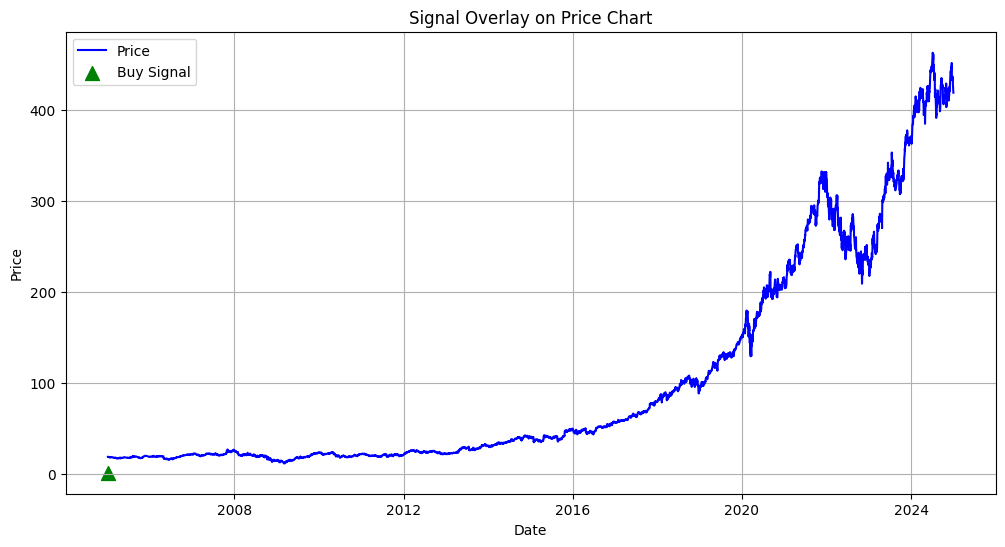

In [4]:
########################
# 1. Signal overlay on price chart for MSFT ticker 
########################

ticker = "MSFT"
price_series = price_data[ticker]

produce_signal_price_chart(strat1, benchmark_results, ticker, dates, price_series)

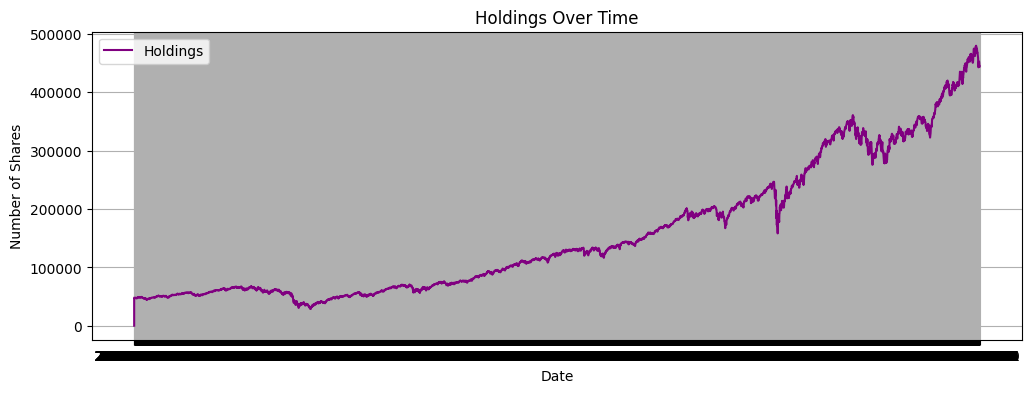

Finished making chart


In [5]:
########################
# 2. Holdings over time
########################

produce_holdings_chart (benchmark_results)
print("Finished making chart") 

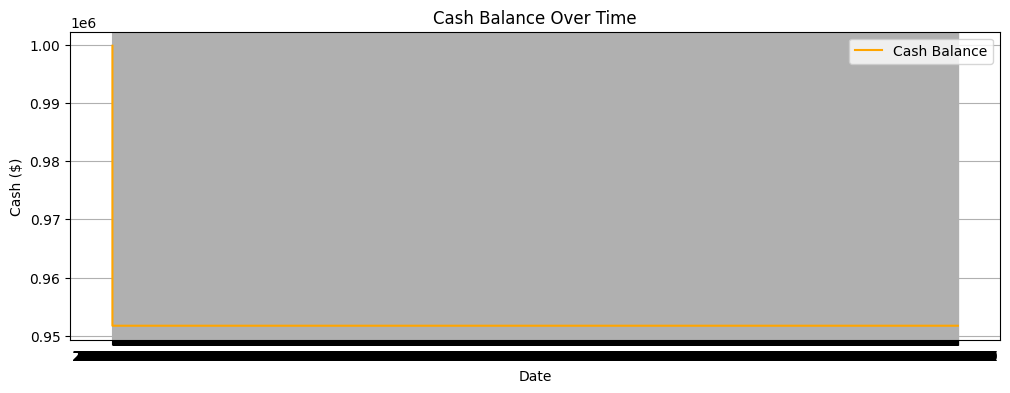

In [8]:
########################
# 3. Cash balance
########################

produce_cash_chart (benchmark_results)


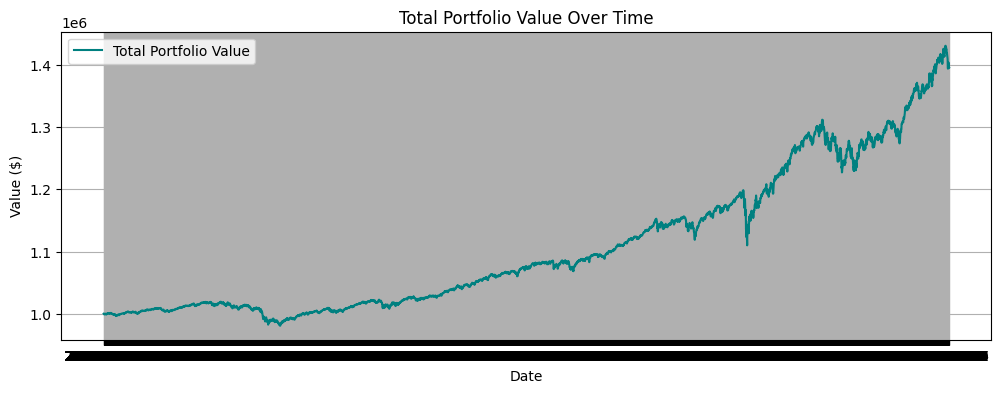

Got to the end


In [13]:
########################
# 4. Total portfolio value
########################

produce_portfolio_val_chart (benchmark_results)

print("Got to the end")

## Moving Average Strategy Results 

In [ ]:
strat2 = MovingAverageStrategy() 
strat2.run(price_data)
ma_results = strat2.get_results() 


MA20 for MMM on day 2005-03-15 00:00:00 (39.149305152893064) is greater than MA50 for MMM on day 2005-03-15 00:00:00 (38.44942596435547). Buying signal.
MA20 for MMM on day 2005-03-16 00:00:00 (39.15939235687256) is greater than MA50 for MMM on day 2005-03-16 00:00:00 (38.486243133544924). Buying signal.
MA20 for MMM on day 2005-03-17 00:00:00 (39.15029926300049) is greater than MA50 for MMM on day 2005-03-17 00:00:00 (38.52890258789063). Buying signal.
MA20 for MMM on day 2005-03-18 00:00:00 (39.17044944763184) is greater than MA50 for MMM on day 2005-03-18 00:00:00 (38.58243774414063). Buying signal.
MA20 for MMM on day 2005-03-21 00:00:00 (39.18301010131836) is greater than MA50 for MMM on day 2005-03-21 00:00:00 (38.624809646606444). Buying signal.
MA20 for MMM on day 2005-03-22 00:00:00 (39.22293186187744) is greater than MA50 for MMM on day 2005-03-22 00:00:00 (38.656850051879886). Buying signal.
MA20 for MMM on day 2005-03-23 00:00:00 (39.24931755065918) is greater than MA50 for

In [ ]:
########################
# 1. Signal overlay on price chart for MSFT ticker 
########################

ticker = "MSFT"
price_series = price_data[ticker]

produce_signal_price_chart(strat2, ticker, dates, price_series) 

In [ ]:
########################
# 2. Holdings over time
########################

produce_holdings_chart (ma_results)

In [ ]:
########################
# 3. Cash balance
########################

produce_cash_chart (ma_results)

In [ ]:
########################
# 4. Total portfolio value
########################

produce_portfolio_val_chart (ma_results)

## Volatility Breakout Strategy Results 

In [ ]:
strat3 = VolatilityBreakoutStrategy() 
strat3.run(price_data)
vol_results = strat3.get_results() 


########################
# 1. Signal overlay on price chart for MSFT ticker 
########################

ticker = "MSFT"
price_series = price_data[ticker]

produce_signal_price_chart(strat3, ticker, dates, price_series) 

########################
# 2. Holdings over time
########################

produce_holdings_chart (vol_results)

########################
# 3. Cash balance
########################

produce_cash_chart (vol_results)

########################
# 4. Total portfolio value
########################

produce_portfolio_val_chart (vol_results)


## MACD Strategy Results 

In [ ]:
strat4 = MACDStrategy() 
strat4.run(price_data)
macd_results = strat4.get_results() 


########################
# 1. Signal overlay on price chart for MSFT ticker 
########################

ticker = "MSFT"
price_series = price_data[ticker]

produce_signal_price_chart(strat4, ticker, dates, price_series) 

########################
# 2. Holdings over time
########################

produce_holdings_chart (macd_results)

########################
# 3. Cash balance
########################

produce_cash_chart (macd_results)

########################
# 4. Total portfolio value
########################

produce_portfolio_val_chart (macd_results)


## RSI Strategy Results 

In [ ]:
strat5 = RSIStrategy() 
strat5.run(price_data)
rsi_results = strat5.get_results() 


########################
# 1. Signal overlay on price chart for MSFT ticker 
########################

ticker = "MSFT"
price_series = price_data[ticker]

produce_signal_price_chart(strat5, ticker, dates, price_series) 

########################
# 2. Holdings over time
########################

produce_holdings_chart (rsi_results)

########################
# 3. Cash balance
########################

produce_cash_chart (rsi_results)

########################
# 4. Total portfolio value
########################

produce_portfolio_val_chart (rsi_results)


## Comparing Cumulative PnL Across Strategies


In [ ]:

# Merge cumulative PnL for comparison
comparison = pd.DataFrame({
    'Date': dates,
    'Benchmark': benchmark_results['CumulativePnL'],
    'MovingAvg': ma_results['CumulativePnL'], 
    'Volatility': vol_results['CumulativePnL'], 
    'MACD': macd_results['CumulativePnL'], 
    'RSI': rsi_results['CumulativePnL'], 
})

plt.figure(figsize=(12,5))

plt.plot(comparison['Date'], comparison['Benchmark'], label='Benchmark', color='black')
plt.plot(comparison['Date'], comparison['MovingAvg'], label='Moving Average Strategy', color='green')
plt.plot(comparison['Date'], comparison['Volatility'], label='Volatility Breakout Strategy', color='blue')
plt.plot(comparison['Date'], comparison['MACD'], label='MACD Strategy', color='purple')
plt.plot(comparison['Date'], comparison['RSI'], label='RSI Strategy', color='orange')

plt.title('Cumulative PnL Comparison Across Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL ($)')
plt.legend()
plt.grid(True)
plt.show()
